# Inaugural Project

Importing modules and EchangeEconomyClass from inauguralproject.py.

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

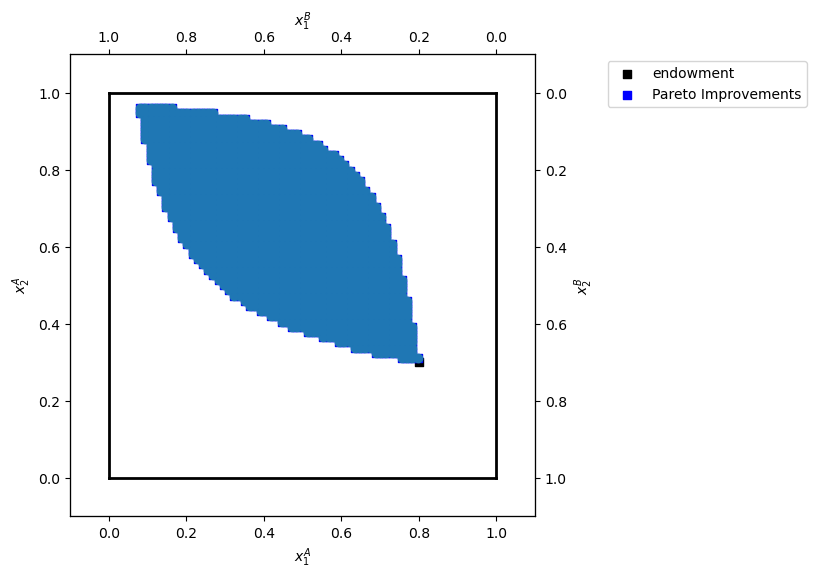

In [87]:
# An instance of the class ExchangeEcoonomyClass is created.
EEC = ExchangeEconomyClass()

# Setting a global variable N
N = 75

# Initializing vector spaces

x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)

# Calculating endowments
uA_endowment = EEC.utility_A(EEC.par.w1A, EEC.par.w2A)
uB_endowment = EEC.utility_B(EEC.par.w1B, EEC.par.w2B)


# Making a new matrix that will be appended with all the values that satisfy constraints.

x1A_edgeworth = []
x2A_edgeworth = []
x1B_edgeworth = []
x2B_edgeworth = []

#Looping over all possible combinations of x1A and x2A, and checking if utility is above endowment utility for both consumers.
for x1A in x1A_vec:
    for x2A in x2A_vec:
        if EEC.utility_A(x1A, x2A) >= uA_endowment and EEC.utility_B(1-x1A, 1-x2A) >= uB_endowment:
                x1A_edgeworth.append(x1A)
                x2A_edgeworth.append(x2A)
                x1B_edgeworth.append(1-x1A)
                x2B_edgeworth.append(1-x2A)

# Pareto improvement allocations from respective consumer perspectives.
#print("Consumer A:")
#print(x1A_edgeworth)
#print(x2A_edgeworth)
#print('\n')
#print("Consumer B:")
#print(x1B_edgeworth)
#print(x2B_edgeworth)


# Plotting

par = EEC.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Endowment point
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(x1A_edgeworth, x2A_edgeworth,marker='s',color='blue',label='Pareto Improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])
ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

#Plotting the area C.
plt.scatter(x1B_edgeworth, x2B_edgeworth)








# Question 2

Excess demand:


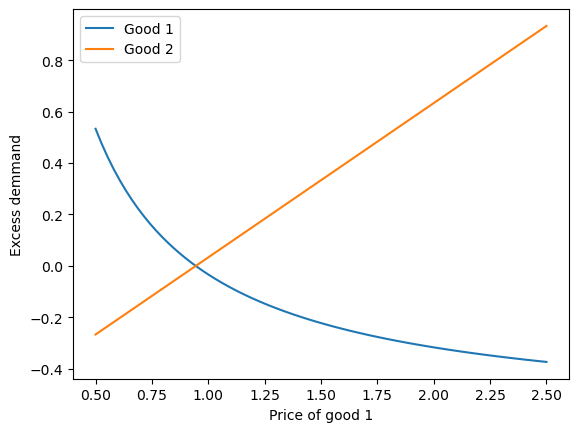

In [114]:


# Initializing global price vector p1:
p1_vec = [0.5]
i = 1

while p1_vec[-1] < 2.5:
    p1_vec.append(0.5 + 2*i/N)
    i += 1


# Calculating excess demand for all prices in p1-space.
excess_demand = []

for p1 in p1_vec:
    excess_demand.append(EEC.check_market_clearing(p1))
    

print("Excess demand:")


# Plot excess demand for each good for all prices in the p1-space.

plt.plot(p1_vec, excess_demand, label=('Good 1', 'Good 2'))
plt.xlabel('Price of good 1')
plt.ylabel('Excess demmand')
plt.legend()






# Question 3

In [89]:
# Market clearing price and allocation.

def function_3():

    # Initializing placeholder variables for storing the best value recorded thus far.
    p1_best = 0
    best_excess_demand = np.inf

    #Creating a larger price vector to search over, to obtain a more precise resuklt for the market clearing price.
    p1_vec_positive = np.linspace(0.1, 3, 1000000)

    # Looping over prices in P1, and searching for the price that yields the lowest possible excess demand.
    for p1 in p1_vec_positive:
        excess_demand_tuple = EEC.check_market_clearing(p1)
        sum_excess_demand = abs(excess_demand_tuple[0]) + abs(excess_demand_tuple[1])
    
        # We store sum of excess demand and price for a given iteration of price, if excess demand is lower than the previous best value.
        if sum_excess_demand < best_excess_demand:
            best_excess_demand = sum_excess_demand
            p1_best = p1

    # Calculating demand at market clearing price.
    demand_tuple_A = EEC.demand_A(p1_best)
    x1A = demand_tuple_A[0]
    x2A = demand_tuple_A[1]

    print("Market clearing price:")
    print(p1_best)
    print('\n')
    print('Allocation to consumer A at market clearing price:')
    print('Good 1: '+ str(x1A))
    print('Good 2: '+ str(x2A))
    return x1A, x2A

# Storing the allocation for the purpose of plotting later.
allocation_3 = function_3()




Market clearing price:
0.9444431444431444


Allocation to consumer A at market clearing price:
Good 1: 0.37254916535213417
Good 2: 0.7037030103696772


# Question 4.a

In [90]:
# Calculating allocation when A maximizes utility independant of market clearing. 
# A chooses price within p1-space, such that A consumes whatever B does not demand.

# We employ the same search algorithm as used before, but with small moderations.
def function_4a():
    p1_best = 0
    best_utility = 0

    for p1 in p1_vec:
        demand_tuple_B = EEC.demand_B(p1)
        x1A = 1 - demand_tuple_B[0]
        x2A = 1 - demand_tuple_B[1]
        # We discard all iterations of the loop, that produces negative quantities of either good.
        if x1A < 0 or x2A < 0:
            continue
        utility_A = EEC.utility_A(x1A, x2A)
        if utility_A > best_utility:
            best_utility = utility_A
            p1_best = p1

    demand_tuple_B_best = EEC.demand_B(p1_best)
    x1A_best = 1 - demand_tuple_B_best[0]
    x2A_best = 1 - demand_tuple_B_best[1]


    print("Allocation that maximizes consumer A's utility, searching over prices within P1:")
    print("x1A:" + str(x1A_best))
    print("x2A:" + str(x2A_best))
    print('\n')
    print('Price:')
    print(str(p1_best))
    print('\n')
    print('Utility for consumer A:')
    print(best_utility)
    return x1A_best, x2A_best


allocation_4a = function_4a()



Allocation that maximizes consumer A's utility, searching over prices within P1:
x1A:0.619316843345112
x2A:0.6408888888888888


Price:
1.8866666666666667


Utility for consumer A:
0.633615985237553


# Question 4.b

In [91]:
def function_4b():
    p1_best = 0
    best_utility = 0
    
    # Initialize price vector, that includes a larger range of positive numbers.
    p1_vec_positive = np.linspace(0, 3, 100000)

    for p1 in p1_vec_positive:
        # We skip the iteration for price = 0, as demand cannot be defined due to zero division.
        if p1 == 0:
            continue
        demand_tuple_B = EEC.demand_B(p1)
        x1A = 1 - demand_tuple_B[0]
        x2A = 1 - demand_tuple_B[1]
        if x1A < 0 or x2A < 0:
            continue
        utility_A = EEC.utility_A(x1A, x2A)
        if utility_A > best_utility:
            best_utility = utility_A
            p1_best = p1

    demand_tuple_B_best = EEC.demand_B(p1_best)
    x1A_best = 1 - demand_tuple_B_best[0]
    x2A_best = 1 - demand_tuple_B_best[1]
    
    print("Allocation that maximizes A's utility, searching over all positive numbers:")
    print("x1A:" + str(x1A_best))
    print("x2A:" + str(x2A_best))
    print('\n')
    print('Price:')
    print(str(p1_best))
    print('\n')
    print('Utility for consumer A:')
    print(best_utility)



    return x1A_best, x2A_best

allocation_4b = function_4b()


# We see that the result is almost identical to 4a, 
# but utility, price and x1A is slightly larger, and x2A is slightly smaller
# because we are searching over a space that has more numbers - we achieve higher precision in comparison to 4a

Allocation that maximizes A's utility, searching over all positive numbers:
x1A:0.620968446768071
x2A:0.6400434004340043


Price:
1.8993489934899348


Utility for consumer A:
0.6336208506934403


# Question 5.a

In [92]:
# Maximizing A's utility among allocations in the set, C.

def function_5a():

    best_utility_A = 0
    x1A_best = 0
    x2A_best = 0

    # We solve this by looping over all solutions in the set C, which are stored in x1A_edgeworth and x2A_edgeworth
    # Indexing the x1A-edgeworth list, so we can call the corresponding element of the x2A-edgeworth list. 
    for index, x1A in enumerate(x1A_edgeworth):
            utility_A = EEC.utility_A(x1A, x2A_edgeworth[index])
            if utility_A > best_utility_A:
                best_utility_A = utility_A
                x1A_best = x1A
                x2A_best = x2A_edgeworth[index]

    print("A's Utility maximizing allocation within the set C:")
    print("x1A:")
    print(x1A_best)
    print("x2A:")
    print(x2A_best)
    return x1A_best, x2A_best


allocation_5a = function_5a()

A's Utility maximizing allocation within the set C:
x1A:
0.5810810810810811
x2A:
0.8378378378378379


# Question 5.b

In [93]:
def function_5b():
    # We solve this as we did in question 1, but we instead use N = 10000, to increase precision.
    N = 10000

    # Initializing new vector spaces.
    x1A_vec = np.linspace(0,1,N)
    x2A_vec = np.linspace(0,1,N)

    # Calculating endowment utilities
    uA_endowment = EEC.utility_A(EEC.par.w1A, EEC.par.w2A)
    uB_endowment = EEC.utility_B(EEC.par.w1B, EEC.par.w2B)


    # Making a new matrix that contains all the values the satisfy constraints.

    x1A_edgeworth = []
    x2A_edgeworth = []
    x1B_edgeworth = []
    x2B_edgeworth = []

    for x1A in x1A_vec:
        for x2A in x2A_vec:
            if EEC.utility_A(x1A, x2A) >= uA_endowment and EEC.utility_B(1-x1A, 1-x2A) >= uB_endowment:
                    x1A_edgeworth.append(x1A)
                    x2A_edgeworth.append(x2A)
                    x1B_edgeworth.append(1-x1A)
                    x2B_edgeworth.append(1-x2A)

    # We have now calculated the same lists of pareto improvement allocations, but with N = 10000
    
    best_utility_A = 0
    x1A_best = 0
    x2A_best = 0

    # We loop over the elements in the allocations, that we just computed, and find the utility maximizing allocation:
    for index, x1A in enumerate(x1A_edgeworth):
            utility_A = EEC.utility_A(x1A, x2A_edgeworth[index])
            utility_B = EEC.utility_B(1 - x1A, 1 - x2A_edgeworth[index])
            if utility_A > best_utility_A:
                best_utility_A = utility_A
                x1A_best = x1A
                x2A_best = x2A_edgeworth[index]

    print("Utility-maximizing allocation for A, that satisfies all conditions from the set C, but searches over a much larger space of possible allocations.")
    print("x1A:")
    print(x1A_best)
    print("x2A:")
    print(x2A_best)

    return x1A_best, x2A_best

allocation_5b = function_5b()

    

Utility-maximizing allocation for A, that satisfies all conditions from the set C, but searches over a much larger space of possible allocations.
x1A:
0.5763576357635763
x2A:
0.843984398439844


# Question 6.a

In [94]:
def function_6a():
    x1_linspace = np.linspace(0, 1, 1000)
    x2_linspace = np.linspace(0, 1, 1000)
    best_total_welfare = 0
    x1A_soc = 0
    x2A_soc = 0
    x1B_soc = 0
    x2B_soc = 0


    for x1A in x1_linspace:
        for x2A in x2_linspace:
            # We define total welfare, and maximize it:
            total_welfare = EEC.utility_A(x1A, x2A) + EEC.utility_B(1-x1A, 1-x2A)
            if total_welfare > best_total_welfare:
                best_total_welfare = total_welfare
                x1A_soc = x1A
                x2A_soc = x2A
                x1B_soc = 1 - x1A
                x2B_soc = 1 - x2A
    print("Socially optimal allocation:")
    print("x1A:")
    print(x1A_soc)
    print("x2A:")
    print(x2A_soc)
    
    return x1A_soc, x2A_soc


allocation_6a = function_6a()


        



Socially optimal allocation:
x1A:
0.3333333333333333
x2A:
0.6666666666666666


# Question 6.b

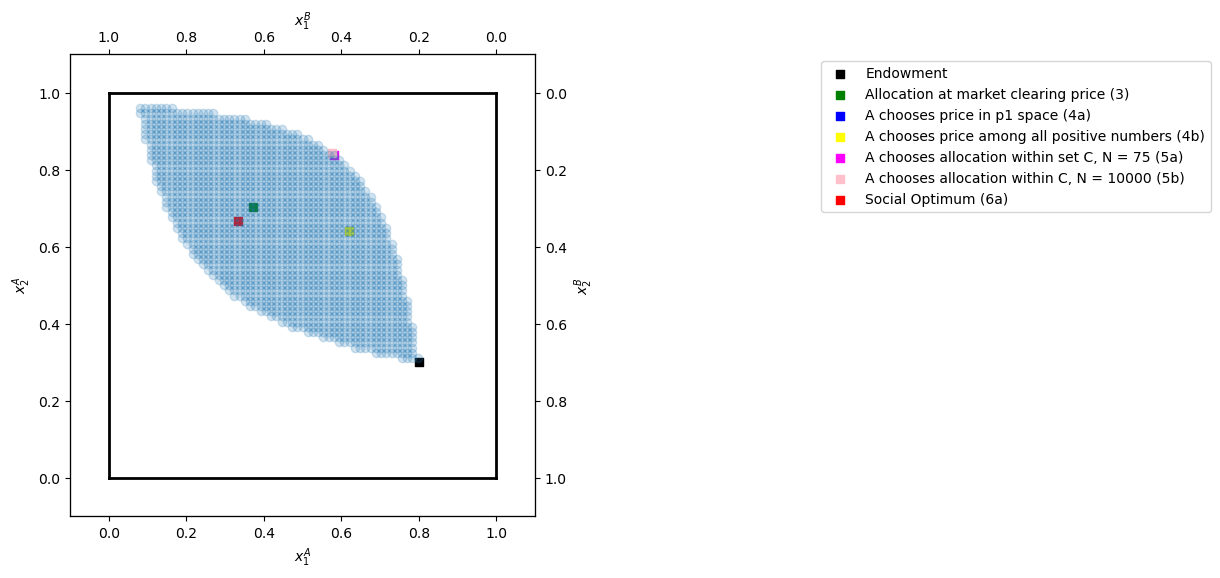

In [95]:
# Using same code for initializing edgeworth box:

par = EEC.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We plot all the allocations computed in previous questions:
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')
ax_A.scatter(allocation_3[0], allocation_3[1],marker='s',color='green',label='Allocation at market clearing price (3)')
ax_A.scatter(allocation_4a[0], allocation_4a[1],marker='s',color='blue',label='A chooses price in p1 space (4a)')
ax_A.scatter(allocation_4b[0], allocation_4b[1],marker='s',color='yellow',label='A chooses price among all positive numbers (4b)')
ax_A.scatter(allocation_5a[0], allocation_5a[1],marker='s',color='magenta',label='A chooses allocation within set C, N = 75 (5a)')
ax_A.scatter(allocation_5b[0], allocation_5b[1],marker='s',color='pink',label='A chooses allocation within C, N = 10000 (5b)')
ax_A.scatter(allocation_6a[0], allocation_6a[1],marker='s',color='red',label='Social Optimum (6a)')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])
ax_A.legend(frameon=True,loc='best',bbox_to_anchor=(1.6,1.0));


plt.scatter(x1B_edgeworth, x2B_edgeworth, alpha = 0.2)


We conclude that the allocation from question 4b is slightly more precise than the allocation computed in 4a, which is why it is not possible to see the blue dotted 4.a allocation.
The same goes for 5b and 5a, as we in 5b and 4a search over a larger space of possible allocations.
We see that these allocations are in almost the same spot on the graph.

We see that the social optimum and the market allocation is fairly similar.

# Question 7

Scatter plot of randomized endowments:


Text(0, 0.5, 'Endowment of good 2')

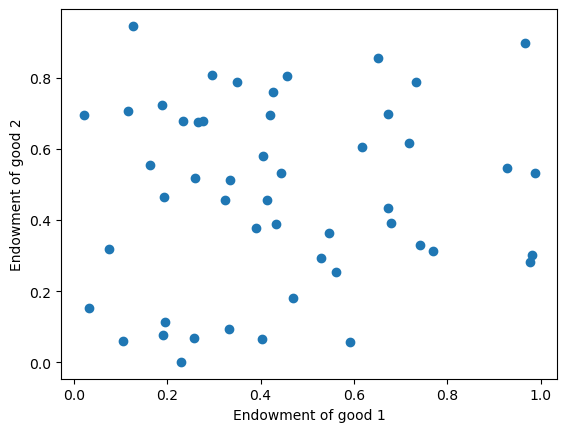

In [113]:
# We initialize seed to 69:

np.random.seed(69)

# We initialize empty set for storing tuples of randomized endowments (omega1 and omega2)
set1 = []
set2 = []

for element in range(0, 50, 1):
    set1.append(np.random.uniform(size = 1))
    set2.append(np.random.uniform(size = 1))
    
print('Scatter plot of randomized endowments:')
plt.scatter(set1, set2)
plt.xlabel('Endowment of good 1')
plt.ylabel('Endowment of good 2')





# Question 8

Market equilibrium allocations given endowments:


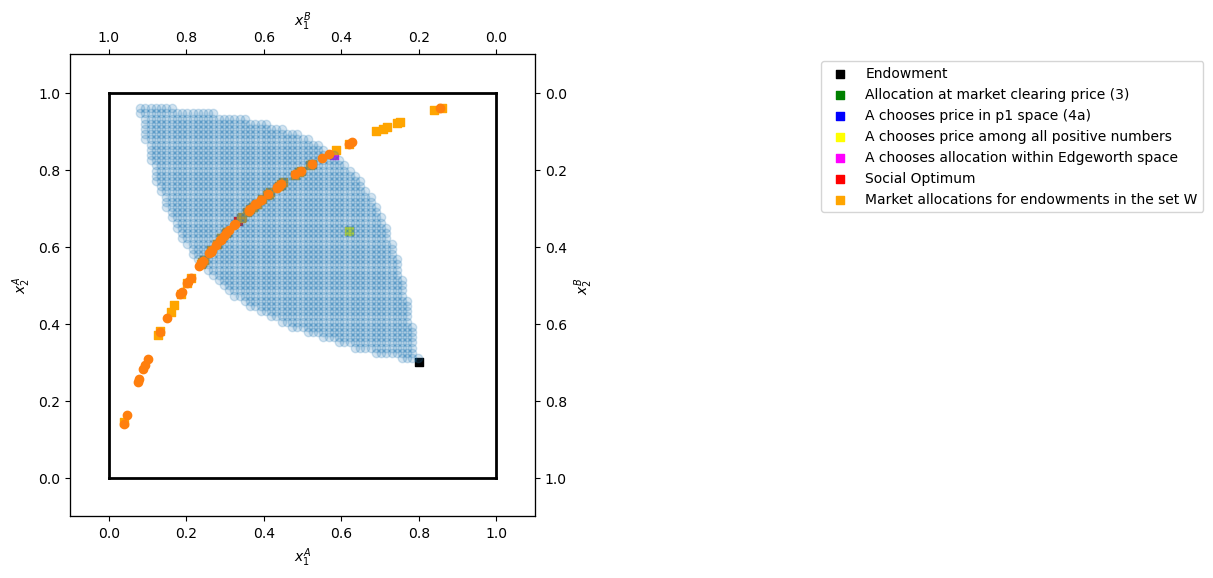

In [115]:
def function_8():
    
    p1_vec_8 = np.linspace(0, 3, 1000)
    p1_best = 0
    best_excess_demand = np.inf
    # Initializing lists that store best prices and allocations for every endowment allocation in the previously defined set:
    best_prices = []
    best_allocs = []

    # We use a nested for-loop to loop over all prices for all endowment allocations, and computing the best price and allocation for every endowment allocation:
    for element in range(0, 50, 1):
        p1_best = 0
        best_excess_demand = np.inf
        for p1 in p1_vec_8:
            if p1 == 0:
                continue
            excess_demand_tuple = EEC.check_market_clearing_endowment(set[element][0], set[element][1], 1 - set[element][0], 1 - set[element][1], p1)
            sum_excess_demand = abs(excess_demand_tuple[0]) + abs(excess_demand_tuple[1])
        
            if sum_excess_demand < best_excess_demand:
                best_excess_demand = sum_excess_demand
                p1_best = p1
        best_prices.append(p1_best)
        best_allocs.append(EEC.demand_A_endowment(set[element][0], set[element][1], p1_best))
    print("Market equilibrium allocations given endowments:")


    best_allocs_x = []
    best_allocs_y = []
    best_allocs_xB = []
    best_allocs_yB = []


    for element in range(0, 50, 1):
        best_allocs_x.append(best_allocs[element][0])
        best_allocs_y.append(best_allocs[element][1])

    best_allocs_xB = [1 - alloc_x for alloc_x in best_allocs_x]
    best_allocs_yB = [1 - alloc_y for alloc_y in best_allocs_y]



    # Plotting
    par = EEC.par

    # a. total endowment
    w1bar = 1.0
    w2bar = 1.0

    # b. figure set up
    fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
    ax_A = fig.add_subplot(1, 1, 1)

    ax_A.set_xlabel("$x_1^A$")
    ax_A.set_ylabel("$x_2^A$")

    temp = ax_A.twinx()
    temp.set_ylabel("$x_2^B$")
    ax_B = temp.twiny()
    ax_B.set_xlabel("$x_1^B$")
    ax_B.invert_xaxis()
    ax_B.invert_yaxis()

    # A
    ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')
    ax_A.scatter(allocation_3[0], allocation_3[1],marker='s',color='green',label='Allocation at market clearing price (3)')
    ax_A.scatter(allocation_4a[0], allocation_4a[1],marker='s',color='blue',label='A chooses price in p1 space (4a)')
    ax_A.scatter(allocation_4b[0], allocation_4b[1],marker='s',color='yellow',label='A chooses price among all positive numbers')
    ax_A.scatter(allocation_5a[0], allocation_5a[1],marker='s',color='magenta',label='A chooses allocation within Edgeworth space ')
    ax_A.scatter(allocation_6a[0], allocation_6a[1],marker='s',color='red',label='Social Optimum')
    ax_A.scatter(best_allocs_yB, best_allocs_xB, marker='s',color='orange',label='Market allocations for endowments in the set W')

    # limits
    ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
    ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
    ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
    ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

    ax_A.set_xlim([-0.1, w1bar + 0.1])
    ax_A.set_ylim([-0.1, w2bar + 0.1])    
    ax_B.set_xlim([w1bar + 0.1, -0.1])
    ax_B.set_ylim([w2bar + 0.1, -0.1])
    ax_A.legend(frameon=True,loc='best',bbox_to_anchor=(1.6,1.0));

    plt.scatter(x1B_edgeworth, x2B_edgeworth, alpha = 0.2)

    # Plotting the utility-maximizing allocations given endowments:
    plt.scatter(best_allocs_xB, best_allocs_yB)

    return

function_8()


